In [1]:
#!pip install jupyterthemes
#!jt -t monokai
#!pip install strsim

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import difflib

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

from similarity.cosine import Cosine

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix

In [48]:
df = pd.read_csv('Dataset/Verusen Manufacturer Pair Annotation Task - Task.csv')
#dropping rightmost 2 columns and last row
df.drop(['Unnamed: 7', 'Code','Confidence','Source','Notes','Task Item'], axis=1,inplace = True)
df.drop(df.tail(1).index,inplace=True)

In [49]:
df

Company A                            Company B  \
0                     ALLEN BRADLEY                  ROCKWELL AUTOMATION   
1                     ALLEN BRADLEY                     ALLEN BRADLEY CO   
2                     CUTLER HAMMER                                EATON   
3                               SKF                      SKF BEARING IND   
4                        ALLENBRADL                        ALLEN BRADLEY   
...                             ...                                  ...   
6943        WUHAN CNACC I/E CO. (I)        XIANTAO XINFA PLASTIC PROD PO   
6944                          WURTH  XINGRONG PROTECTIVE PRODUCTS CO LTD   
6945  XIANTAO XINFA PLASTIC PROD PO  XINGRONG PROTECTIVE PRODUCTS CO LTD   
6946                           ZING                 ZING ENTERPRISES LLC   
6947           ZING ENTERPRISES LLC                ZING ENTERPRISES, LLC   

      Label  
0       3.0  
1       1.0  
2       3.0  
3       1.0  
4       1.0  
...     ...  
6943    NaN  
6944    NaN  
6945    NaN  
6946    NaN  
6947    1.0  

[6948 rows x 3 columns]

In [50]:
# Out of 6948 data, we only have 1521 labeled data.
df = df[df['Label'].notna()]

In [51]:
df.reset_index(drop = True, inplace = True)

## difflib.SequenceMatcher

In [52]:
df['similarity_score'] = (
    df[['Company A','Company B']]
    .apply(lambda x: difflib.SequenceMatcher(None, x[0].lower(), x[1].lower()).ratio(), axis=1)
)

In [53]:
df

Company A                      Company B  Label  \
0                     ALLEN BRADLEY            ROCKWELL AUTOMATION    3.0   
1                     ALLEN BRADLEY               ALLEN BRADLEY CO    1.0   
2                     CUTLER HAMMER                          EATON    3.0   
3                               SKF                SKF BEARING IND    1.0   
4                        ALLENBRADL                  ALLEN BRADLEY    1.0   
...                             ...                            ...    ...   
1516             WEILER CORPORATION             WEILER CORPORATION    1.0   
1517                         WELDAS                 WELDAS COMPANY    1.0   
1518    WELLS LAMONT INDUSTRY GROUP    WELLS LAMONT INDUSTRY GROUP    1.0   
1519  WORLDWIDE PROTECTIVE PRODUCTS  WORLDWIDE PROTECTIVE PRODUCTS    1.0   
1520           ZING ENTERPRISES LLC          ZING ENTERPRISES, LLC    1.0   

      similarity_score  
0             0.187500  
1             0.896552  
2             0.111111  
3             0.333333  
4             0.869565  
...                ...  
1516          1.000000  
1517          0.600000  
1518          1.000000  
1519          1.000000  
1520          0.975610  

[1521 rows x 4 columns]

In [54]:
df[df['similarity_score'] > 0.5][df['Label'] == 4]

Company A                     Company B  Label  \
6                        MARQUIP                    MARQUIPWAR    4.0   
39                LINK-BELT CORP                 REX LINK BELT    4.0   
94                  BUSSMAN FUSE  BUSSMANN (COOPER INDUSTRIES)    4.0   
109             CONTROL SOUTHERN               FISHER CONTROLS    4.0   
146     TOSHIBA AMERICA CONSUMER              TOSHIBA ELECTRIC    4.0   
230                 GOULD MODICO                   MODICON INC    4.0   
235              METSO-EURODRIVE                 SEW EURODRIVE    4.0   
245                    SCHNEIDER     SCHNEIDER PACKAGING EQUIP    4.0   
253     TOSHIBA AMERICA CONSUMER     TOSHIBA INTERNATIONAL COR    4.0   
259                 DODGE CO INC                  DODGE-TIMKEN    4.0   
319                   PARKER CPI               PARKER HANNIFIN    4.0   
487             GENERAL ELECTRIC              GRAYBAR ELECTRIC    4.0   
601                      SIEMENS                      TEXASINS    4.0   
617    TOSHIBA INTERNATIONAL COR                  TOSHIBAMERIC    4.0   
711                       BALDOR               BALDOR-RELIANCE    4.0   
838                        EATON                EATON AIR FLEX    4.0   
881                       FISHER             FISHER SCIENTIFIC    4.0   
916     GENERAL ELECTRIC COMPANY                PLATT ELECTRIC    4.0   
1007                     LINCOLN                  LINCOLN ELET    4.0   
1033            METSO DRIVES LTD                   METSO PAPER    4.0   
1077              PLATT ELECTRIC         WESTINGHOUSE ELECTRIC    4.0   
1110                 SO VEDACOES                      VEDABRAS    4.0   
1118       STEARNS ELECTRIC CORP                  STEARNS ROGE    4.0   
1130  TECO-WESTINGHOUSE MOTOR CO      WESTINGHOUSE ELECTRIC CO    4.0   
1137            TSUBAKI CHAIN CO                US TSUBAKI INC    4.0   
1222                     EMERSON                  EMERSONPROCE    4.0   
1251               GOULD MODICON                   MODICON INC    4.0   
1311                 LENOX TWILL                         TWILL    4.0   
1328                 METSO PAPER                   METSO POWER    4.0   
1401          SULZER ESCHER WYSS                  SULZER PUMPS    4.0   

      similarity_score  
6             0.823529  
39            0.592593  
94            0.550000  
109           0.516129  
146           0.600000  
230           0.521739  
235           0.714286  
245           0.529412  
253           0.653061  
259           0.583333  
319           0.640000  
487           0.750000  
601           0.533333  
617           0.594595  
711           0.571429  
838           0.526316  
881           0.521739  
916           0.526316  
1007          0.736842  
1033          0.518519  
1077          0.571429  
1110          0.526316  
1118          0.545455  
1130          0.720000  
1137          0.733333  
1222          0.736842  
1251          0.583333  
1311          0.625000  
1328          0.818182  
1401          0.533333

In [55]:
# Calculate Average Similarity Score:
avg = []
labels = [0,1,2,3,4]
for l in labels:
    avg.append(sum(df[df['Label'] == l]['similarity_score'])/len(df[df['Label'] == l]['similarity_score']))
print(avg)
    


[0.28392464525250605, 0.6650364402140688, 0.2815545615150303, 0.27017230101325723, 0.3088925906427905]


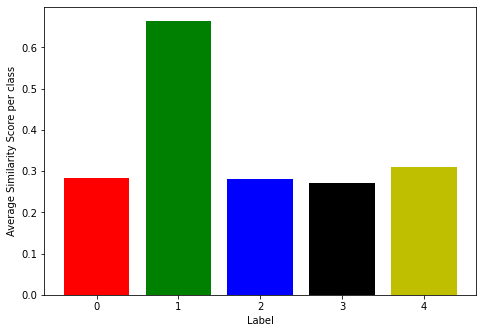

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,avg,color = ['r', 'g', 'b', 'k', 'y', 'm', 'c'])
plt.xlabel('Label')
plt.ylabel('Average Similarity Score per class')
plt.show()

<AxesSubplot:title={'center':'similarity_score'}, xlabel='Label'>

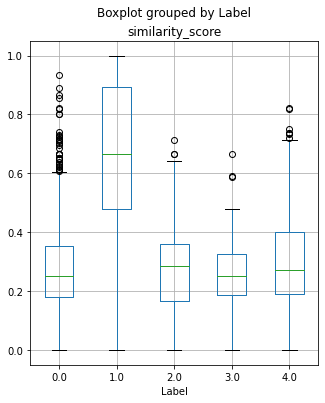

In [57]:
df.boxplot (column='similarity_score', by='Label', figsize=(5,6))

In [58]:
df[df['similarity_score'] > 0.6][df['Label'] == 0]

Company A                       Company B  \
111                                  NSK                             SKF   
135                                 NEXE                           NEXEN   
249                                SEMCO                           SENCO   
297             ENVIRONMENTAL CONSULTING       ENVIRONMENTAL ELEMENTS CO   
331                             THOMPSON                 THOMSON BEARING   
334                      WARNER ELECTRIC                 WARREN ELECTRIC   
340                CLEVELAND TWIST DRILL           PRECISION TWIST DRILL   
384                          AMI BEARING                   PEER BEARINGS   
460              ELECTRONIC MACHINE PART           ELECTRON MACHINE CORP   
531                         MA INDUSTRIE        MAINE INDUSTRIAL PRODUCT   
582                      PHOENIX CONTACT          PHOENIX TECHNOLOGY INC   
584                    PRENTICE HALL INC             PRENTICE OMARK INDU   
615                         THOMPSON INC          THOMSON INDUSTRIES INC   
648                AES ENGINEERED SYSTEM            ALBANY ENGINEERED SY   
692                                 ASCO                         ASCOVAL   
759               BROWN PAPER CONVERTING        PAPER CONVERTING MACHINE   
763                  BUSCHMAN CORPORATIO                  THE BUSHMAN CO   
787                         CENTEC FALSO                  CENTEC-SENSORS   
867                    FAG BEARINGS CORP                 SKF BEARING IND   
918                            GEO MEYER                           MEYER   
946                      HANSEN COUPLING                      HANSEN MFG   
1047                      NATIONAL CARBO       NATIONAL ELECTRICAL CARBO   
1079  PROCESSING TECHNOLOGIES INTL (PTI)  PTI TECHNOLOGIES INC (FILTERS)   
1101                            SHURLITE                         SURLITE   
1128                             TASHIBA                         TOSHIBA   
1140          UNITED CONTAINER MACHINERY            UNITED CONVEYOR CORP   
1151               WORTHINGTON INDUSTRIE                WORTHINGTON PUMP   
1221               ELECTRON MACHINE CORP        ELECTRONIC MACHINE PARTS   
1230                   FAG BEARINGS CORP                    NSK BEARINGS   
1231                   FAG BEARINGS CORP         NTN BEARING CORPORATION   
1238                  FORNEY ENGINEERING           SCHNEIDER ENGINEERING   
1245                    GENERAL ELECTRIC            RELIANCE ELECTRIC CO   
1318                       MA INDUSTRIES       MAINE INDUSTRIAL PRODUCTS   
1355                        NSK BEARINGS                 SKF BEARING IND   
1409             UNIVERSAL ELECTRIC CORP          UNIVERSAL SILENCER INC   
1420                      PAPE MACHINERY            PAPER MACHINERY CORP   

      Label  similarity_score  
111     0.0          0.666667  
135     0.0          0.888889  
249     0.0          0.800000  
297     0.0          0.653061  
331     0.0          0.608696  
334     0.0          0.866667  
340     0.0          0.666667  
384     0.0          0.666667  
460     0.0          0.818182  
531     0.0          0.611111  
582     0.0          0.648649  
584     0.0          0.722222  
615     0.0          0.647059  
648     0.0          0.731707  
692     0.0          0.727273  
759     0.0          0.695652  
763     0.0          0.606061  
787     0.0          0.615385  
867     0.0          0.625000  
918     0.0          0.714286  
946     0.0          0.640000  
1047    0.0          0.717949  
1079    0.0          0.687500  
1101    0.0          0.933333  
1128    0.0          0.857143  
1140    0.0          0.652174  
1151    0.0          0.702703  
1221    0.0          0.800000  
1230    0.0          0.620690  
1231    0.0          0.650000  
1238    0.0          0.717949  
1245    0.0          0.666667  
1318    0.0          0.631579  
1355    0.0          0.740741  
1409    0.0          0.711111  
1420    0.0          0.823529

<AxesSubplot:xlabel='Label', ylabel='similarity_score'>

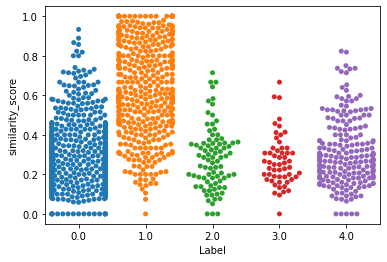

In [59]:
sns.swarmplot(x='Label', y='similarity_score', data=df) 

## Jarowinkle Similarity

In [60]:
from similarity.jarowinkler import JaroWinkler
from pyjarowinkler import distance
df["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i,j in zip(df["Company A"],df["Company B"])]

In [61]:
df

Company A                      Company B  Label  \
0                     ALLEN BRADLEY            ROCKWELL AUTOMATION    3.0   
1                     ALLEN BRADLEY               ALLEN BRADLEY CO    1.0   
2                     CUTLER HAMMER                          EATON    3.0   
3                               SKF                SKF BEARING IND    1.0   
4                        ALLENBRADL                  ALLEN BRADLEY    1.0   
...                             ...                            ...    ...   
1516             WEILER CORPORATION             WEILER CORPORATION    1.0   
1517                         WELDAS                 WELDAS COMPANY    1.0   
1518    WELLS LAMONT INDUSTRY GROUP    WELLS LAMONT INDUSTRY GROUP    1.0   
1519  WORLDWIDE PROTECTIVE PRODUCTS  WORLDWIDE PROTECTIVE PRODUCTS    1.0   
1520           ZING ENTERPRISES LLC          ZING ENTERPRISES, LLC    1.0   

      similarity_score  jarowinkler_sim  
0             0.187500             0.50  
1             0.896552             0.96  
2             0.111111             0.43  
3             0.333333             0.81  
4             0.869565             0.95  
...                ...              ...  
1516          1.000000             1.00  
1517          0.600000             0.89  
1518          1.000000             1.00  
1519          1.000000             1.00  
1520          0.975610             0.99  

[1521 rows x 5 columns]

In [62]:
df[df['jarowinkler_sim'] > 0.6][df['Label'] == 0]

Company A                     Company B  Label  \
15    INTERNATIONAL PAPER BOX MACHINE CO  WESTERN SLOPE INDUSTRIES INC    0.0   
70                     MCGILL MFG CO INC     MCGILL PRECISION BEARINGS    0.0   
86                         ALLEN BRADLEY                  CARMANAH DES    0.0   
103              FISHER CONTROLS COMPANY                 FISHER SUPPLY    0.0   
111                                  NSK                           SKF    0.0   
...                                  ...                           ...    ...   
1357             NTN BEARING CORPORATION                  RBC BEARINGS    0.0   
1409             UNIVERSAL ELECTRIC CORP        UNIVERSAL SILENCER INC    0.0   
1418           FOX VALLEY INDUSTRIAL CON     FOX VALLEY TOOL & DIE INC    0.0   
1420                      PAPE MACHINERY          PAPER MACHINERY CORP    0.0   
1449                      ARMOR GUYS INC              WELLS FARGO BANK    0.0   

      similarity_score  jarowinkler_sim  
15            0.419355             0.63  
70            0.476190             0.80  
86            0.160000             0.61  
103           0.500000             0.79  
111           0.666667             0.78  
...                ...              ...  
1357          0.457143             0.63  
1409          0.711111             0.90  
1418          0.560000             0.88  
1420          0.823529             0.94  
1449          0.333333             0.61  

[139 rows x 5 columns]

<AxesSubplot:title={'center':'jarowinkler_sim'}, xlabel='Label'>

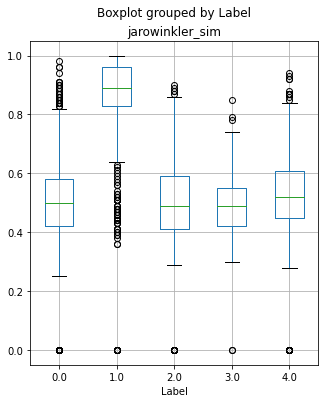

In [63]:
df.boxplot (column='jarowinkler_sim', by='Label', figsize=(5,6))

## Cosine Similarity

In [64]:
from similarity.cosine import Cosine
cosine = Cosine(2)
df["p0"] = df["Company A"].apply(lambda s: cosine.get_profile(s)) 
df["p1"] = df["Company B"].apply(lambda s: cosine.get_profile(s)) 
df["cosine_sim"] = [cosine.similarity_profiles(p0,p1) for p0,p1 in zip(df["p0"],df["p1"])]
#df.drop(["p0", "p1"], axis=1, inplace = True)

In [65]:
df

Company A                      Company B  Label  \
0                     ALLEN BRADLEY            ROCKWELL AUTOMATION    3.0   
1                     ALLEN BRADLEY               ALLEN BRADLEY CO    1.0   
2                     CUTLER HAMMER                          EATON    3.0   
3                               SKF                SKF BEARING IND    1.0   
4                        ALLENBRADL                  ALLEN BRADLEY    1.0   
...                             ...                            ...    ...   
1516             WEILER CORPORATION             WEILER CORPORATION    1.0   
1517                         WELDAS                 WELDAS COMPANY    1.0   
1518    WELLS LAMONT INDUSTRY GROUP    WELLS LAMONT INDUSTRY GROUP    1.0   
1519  WORLDWIDE PROTECTIVE PRODUCTS  WORLDWIDE PROTECTIVE PRODUCTS    1.0   
1520           ZING ENTERPRISES LLC          ZING ENTERPRISES, LLC    1.0   

      similarity_score  jarowinkler_sim  \
0             0.187500             0.50   
1             0.896552             0.96   
2             0.111111             0.43   
3             0.333333             0.81   
4             0.869565             0.95   
...                ...              ...   
1516          1.000000             1.00   
1517          0.600000             0.89   
1518          1.000000             1.00   
1519          1.000000             1.00   
1520          0.975610             0.99   

                                                     p0  \
0     {'AL': 1, 'LL': 1, 'LE': 2, 'EN': 1, 'NB': 1, ...   
1     {'AL': 1, 'LL': 1, 'LE': 2, 'EN': 1, 'NB': 1, ...   
2     {'CU': 1, 'UT': 1, 'TL': 1, 'LE': 1, 'ER': 2, ...   
3                                    {'SK': 1, 'KF': 1}   
4     {'AL': 1, 'LL': 1, 'LE': 1, 'EN': 1, 'NB': 1, ...   
...                                                 ...   
1516  {'WE': 1, 'EI': 1, 'IL': 1, 'LE': 1, 'ER': 1, ...   
1517      {'WE': 1, 'EL': 1, 'LD': 1, 'DA': 1, 'AS': 1}   
1518  {'WE': 1, 'EL': 1, 'LL': 1, 'LS': 1, 'SL': 1, ...   
1519  {'WO': 1, 'OR': 1, 'RL': 1, 'LD': 1, 'DW': 1, ...   
1520  {'ZI': 1, 'IN': 1, 'NG': 1, 'GE': 1, 'EN': 1, ...   

                                                     p1  cosine_sim  
0     {'RO': 1, 'OC': 1, 'CK': 1, 'KW': 1, 'WE': 1, ...    0.067267  
1     {'AL': 1, 'LL': 1, 'LE': 2, 'EN': 1, 'NB': 1, ...    0.930949  
2                  {'EA': 1, 'AT': 1, 'TO': 1, 'ON': 1}    0.000000  
3     {'SK': 1, 'KF': 1, 'FB': 1, 'BE': 1, 'EA': 1, ...    0.377964  
4     {'AL': 1, 'LL': 1, 'LE': 2, 'EN': 1, 'NB': 1, ...    0.924500  
...                                                 ...         ...  
1516  {'WE': 1, 'EI': 1, 'IL': 1, 'LE': 1, 'ER': 1, ...    1.000000  
1517  {'WE': 1, 'EL': 1, 'LD': 1, 'DA': 1, 'AS': 1, ...    0.645497  
1518  {'WE': 1, 'EL': 1, 'LL': 1, 'LS': 1, 'SL': 1, ...    1.000000  
1519  {'WO': 1, 'OR': 1, 'RL': 1, 'LD': 1, 'DW': 1, ...    1.000000  
1520  {'ZI': 1, 'IN': 1, 'NG': 1, 'GE': 1, 'EN': 1, ...    0.914659  

[1521 rows x 8 columns]

<AxesSubplot:title={'center':'cosine_sim'}, xlabel='Label'>

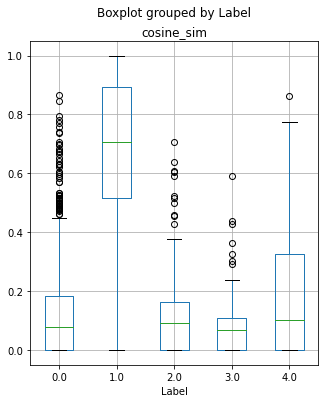

In [66]:
df.boxplot (column='cosine_sim', by='Label', figsize=(5,6))

In [67]:
df[df['cosine_sim'] > 0.6][df['Label'] == 0]

Company A                  Company B  Label  \
135                       NEXE                      NEXEN    0.0   
297   ENVIRONMENTAL CONSULTING  ENVIRONMENTAL ELEMENTS CO    0.0   
334            WARNER ELECTRIC            WARREN ELECTRIC    0.0   
384                AMI BEARING              PEER BEARINGS    0.0   
419                  CASCACORP                   CASCADES    0.0   
460    ELECTRONIC MACHINE PART      ELECTRON MACHINE CORP    0.0   
531               MA INDUSTRIE   MAINE INDUSTRIAL PRODUCT    0.0   
615               THOMPSON INC     THOMSON INDUSTRIES INC    0.0   
648      AES ENGINEERED SYSTEM       ALBANY ENGINEERED SY    0.0   
692                       ASCO                    ASCOVAL    0.0   
759     BROWN PAPER CONVERTING   PAPER CONVERTING MACHINE    0.0   
918                  GEO MEYER                      MEYER    0.0   
950       HARWAL INTERNATIONAL          NATIONAL OIL SEAL    0.0   
1047            NATIONAL CARBO  NATIONAL ELECTRICAL CARBO    0.0   
1101                  SHURLITE                    SURLITE    0.0   
1128                   TASHIBA                    TOSHIBA    0.0   
1151     WORTHINGTON INDUSTRIE           WORTHINGTON PUMP    0.0   
1220              ELECTRA GEAR           GENERAL ELECTRIC    0.0   
1221     ELECTRON MACHINE CORP   ELECTRONIC MACHINE PARTS    0.0   
1238        FORNEY ENGINEERING      SCHNEIDER ENGINEERING    0.0   
1318             MA INDUSTRIES  MAINE INDUSTRIAL PRODUCTS    0.0   
1355              NSK BEARINGS            SKF BEARING IND    0.0   
1420            PAPE MACHINERY       PAPER MACHINERY CORP    0.0   

      similarity_score  jarowinkler_sim  \
135           0.888889             0.96   
297           0.653061             0.91   
334           0.866667             0.98   
384           0.666667             0.70   
419           0.588235             0.84   
460           0.818182             0.90   
531           0.611111             0.74   
615           0.647059             0.86   
648           0.731707             0.80   
692           0.727273             0.91   
759           0.695652             0.69   
918           0.714286             0.54   
950           0.432432             0.65   
1047          0.717949             0.85   
1101          0.933333             0.96   
1128          0.857143             0.91   
1151          0.702703             0.89   
1220          0.428571             0.64   
1221          0.800000             0.90   
1238          0.717949             0.72   
1318          0.631579             0.71   
1355          0.740741             0.86   
1420          0.823529             0.94   

                                                     p0  \
135                         {'NE': 1, 'EX': 1, 'XE': 1}   
297   {'EN': 2, 'NV': 1, 'VI': 1, 'IR': 1, 'RO': 1, ...   
334   {'WA': 1, 'AR': 1, 'RN': 1, 'NE': 1, 'ER': 1, ...   
384   {'AM': 1, 'MI': 1, 'IB': 1, 'BE': 1, 'EA': 1, ...   
419   {'CA': 2, 'AS': 1, 'SC': 1, 'AC': 1, 'CO': 1, ...   
460   {'EL': 1, 'LE': 1, 'EC': 1, 'CT': 1, 'TR': 1, ...   
531   {'MA': 1, 'AI': 1, 'IN': 1, 'ND': 1, 'DU': 1, ...   
615   {'TH': 1, 'HO': 1, 'OM': 1, 'MP': 1, 'PS': 1, ...   
648   {'AE': 1, 'ES': 1, 'SE': 1, 'EN': 1, 'NG': 1, ...   
692                         {'AS': 1, 'SC': 1, 'CO': 1}   
759   {'BR': 1, 'RO': 1, 'OW': 1, 'WN': 1, 'NP': 1, ...   
918   {'GE': 1, 'EO': 1, 'OM': 1, 'ME': 1, 'EY': 1, ...   
950   {'HA': 1, 'AR': 1, 'RW': 1, 'WA': 1, 'AL': 2, ...   
1047  {'NA': 2, 'AT': 1, 'TI': 1, 'IO': 1, 'ON': 1, ...   
1101  {'SH': 1, 'HU': 1, 'UR': 1, 'RL': 1, 'LI': 1, ...   
1128  {'TA': 1, 'AS': 1, 'SH': 1, 'HI': 1, 'IB': 1, ...   
1151  {'WO': 1, 'OR': 1, 'RT': 1, 'TH': 1, 'HI': 1, ...   
1220  {'EL': 1, 'LE': 1, 'EC': 1, 'CT': 1, 'TR': 1, ...   
1221  {'EL': 1, 'LE': 1, 'EC': 2, 'CT': 1, 'TR': 1, ...   
1238  {'FO': 1, 'OR': 1, 'RN': 1, 'NE': 2, 'EY': 1, ...   
1318  {'MA': 1, 'AI': 1, 'IN': 1, 'ND': 1, 'DU': 1, ...   
1355  {'NS': 1, 'SK': 1, 'KB': 1, 'BE': 1, 'EA': 1, ...  

<AxesSubplot:xlabel='Label', ylabel='cosine_sim'>

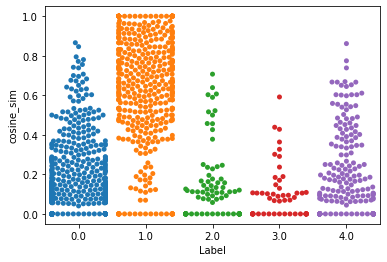

In [68]:
sns.swarmplot(x='Label', y='cosine_sim', data=df) 

In [69]:
# # Plot
# plt.figure(figsize=(10,8), dpi= 80)
# sns.pairplot(df, kind="reg", hue="Label")
# plt.show()

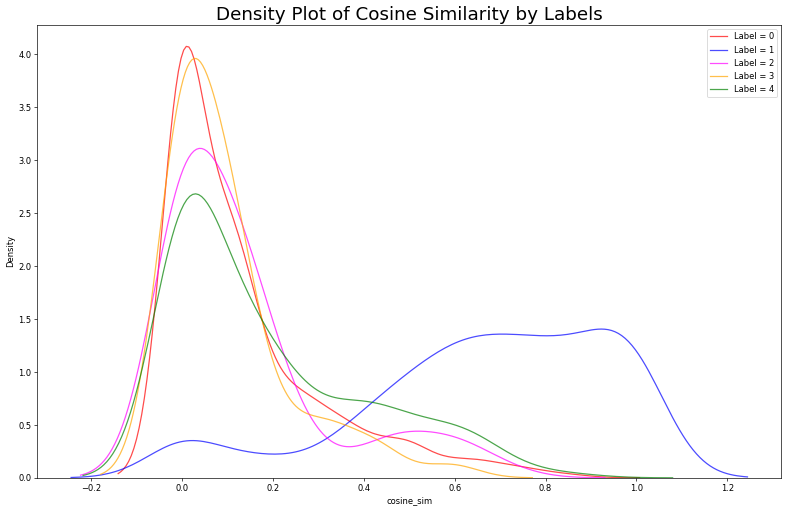

In [70]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 60)
sns.kdeplot(df.loc[df['Label'] == 0, "cosine_sim"], shade=False, color="r", label="Label = 0", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 1, "cosine_sim"], shade=False, color="b", label="Label = 1", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 2, "cosine_sim"], shade=False, color="magenta", label="Label = 2", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 3, "cosine_sim"], shade=False, color="orange", label="Label = 3", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 4, "cosine_sim"], shade=False, color="g", label="Label = 4", alpha=.7)

# Decoration
plt.title('Density Plot of Cosine Similarity by Labels', fontsize=22)
plt.legend()
plt.show()

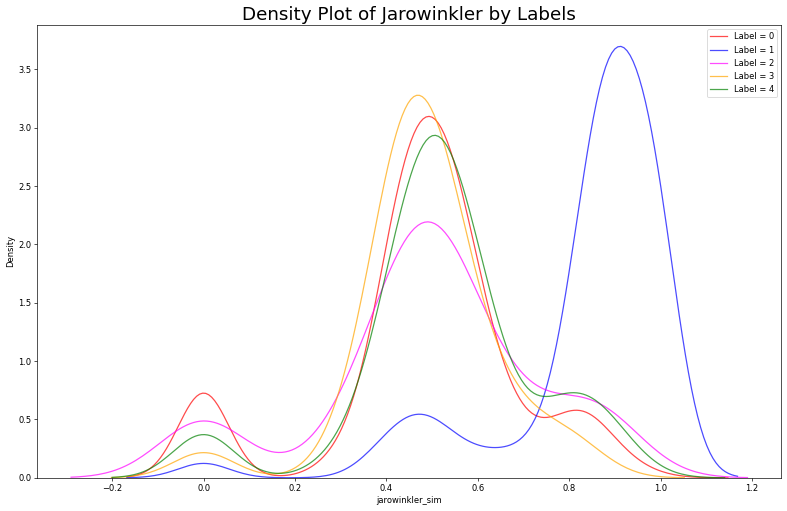

In [71]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 60)
sns.kdeplot(df.loc[df['Label'] == 0, "jarowinkler_sim"], shade=False, color="r", label="Label = 0", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 1, "jarowinkler_sim"], shade=False, color="b", label="Label = 1", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 2, "jarowinkler_sim"], shade=False, color="magenta", label="Label = 2", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 3, "jarowinkler_sim"], shade=False, color="orange", label="Label = 3", alpha=.7)
sns.kdeplot(df.loc[df['Label'] == 4, "jarowinkler_sim"], shade=False, color="g", label="Label = 4", alpha=.7)

# Decoration
plt.title('Density Plot of Jarowinkler by Labels', fontsize=22)
plt.legend()
plt.show()

## Perform Classification by considering Jarowinkler Similarity

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [73]:
# Convert the labels of data as Label 1 and other data Label 0
df['Label'].loc[df['Label'] != 1] = 0.0

In [74]:
# Assign values to the X and y variables:
X = df.iloc[:, 4].values
y = df.iloc[:, 2].values 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1))

StandardScaler()

In [80]:
X_train = scaler.transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1)) 

In [81]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [82]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [83]:
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[299  20]
 [ 36 102]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       319
         1.0       0.84      0.74      0.78       138

    accuracy                           0.88       457
   macro avg       0.86      0.84      0.85       457
weighted avg       0.88      0.88      0.88       457

0.8774617067833698


In [84]:
sum(y_predict == 1)

122

In [85]:
# Gaussian Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train, y_train)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)
# print(predictive_labels)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

0.8840262582056893


In [86]:
# Random Forest Classifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionforest))

[[292  27]
 [ 24 114]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       319
         1.0       0.81      0.83      0.82       138

    accuracy                           0.89       457
   macro avg       0.87      0.87      0.87       457
weighted avg       0.89      0.89      0.89       457

0.888402625820569


## Predicting on Unseen Dataset

In [53]:
test_df = pd.read_csv('Dataset/Verusen Manufacturer Pair Annotation Task - Task.csv')
#dropping rightmost 2 columns and last row
test_df = test_df[test_df['Label'].isnull()]
test_df.drop(['Unnamed: 7', 'Code','Confidence','Source','Notes','Task Item','Label'], axis=1,inplace = True)

In [54]:
test_df


Company A                            Company B
316              NATIONAL SEALS/FDM                               TIMKEN
346                  LINK-BELT CORP                                  SKF
363                             SKF                             STANDARD
370                        AIR FLOW                       INGERSOLL RAND
376                   ALLEN BRADLEY                      IFM EFECTOR INC
...                             ...                                  ...
6942        WUHAN CNACC I/E CO. (I)               XIANTAO RAYXIN MEDICAL
6943        WUHAN CNACC I/E CO. (I)        XIANTAO XINFA PLASTIC PROD PO
6944                          WURTH  XINGRONG PROTECTIVE PRODUCTS CO LTD
6945  XIANTAO XINFA PLASTIC PROD PO  XINGRONG PROTECTIVE PRODUCTS CO LTD
6946                           ZING                 ZING ENTERPRISES LLC

[5427 rows x 2 columns]

In [55]:
test_df["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i,j in zip(test_df["Company A"],test_df["Company B"])]

In [56]:
X_unseen = test_df.iloc[:, 2].values 

In [57]:
X_unseen = scaler.transform(X_unseen.reshape(-1,1)) 

In [58]:
predictionforest = trainedforest.predict(X_unseen)

In [59]:
final_df = pd.DataFrame({'Company A':test_df['Company A'],'Company B':test_df['Company B'],'Label' : predictionforest})

In [63]:
final_df[final_df['Label'] == 1]

Company A                            Company B  \
546                            MARE                                MAREN   
624               STEARNS / REXNORD                         STEARNS ROGE   
626          STEARNS MAGNETICS INC.                         STEARNS ROGE   
641                    WESTINGHOUSE           WESTINGHOUSE CUTLER HAMMER   
642             WESTINGHOUSE CANADA            WESTINGHOUSE GEAR REDUCER   
...                             ...                                  ...   
6935                      WOLVERINE             WOLVERINE WORLD WIDE INC   
6937                      WORLDWIDE        WORLDWIDE PROTECTIVE PRODUCTS   
6938                      WORLDWIDE   WORLDWIDE PROTECTIVE PRODUCTS (AD)   
6940  WORLDWIDE PROTECTIVE PRODUCTS   WORLDWIDE PROTECTIVE PRODUCTS (AD)   
6945  XIANTAO XINFA PLASTIC PROD PO  XINGRONG PROTECTIVE PRODUCTS CO LTD   

      Label  
546     1.0  
624     1.0  
626     1.0  
641     1.0  
642     1.0  
...     ...  
6935    1.0  
6937    1.0  
6938    1.0  
6940    1.0  
6945    1.0  

[439 rows x 3 columns]

In [64]:
#final_df.to_csv('Label 1.csv',index=False)
final_df.to_excel('Label 1_Similarity.xlsx',index=False)

## Perform Classification by considering Cosine Similarity

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
# Convert the labels of data as Label 1 and other data Label 0
df['Label'].loc[df['Label'] != 1] = 0.0

In [122]:
# Assign values to the X and y variables:
X = df.iloc[:, 5].values
y = df.iloc[:, 2].values 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1))

StandardScaler()

In [81]:
X_train = scaler.transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1)) 

In [82]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [83]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [84]:
# Print results: 
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[288  26]
 [ 31 112]]
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       314
         1.0       0.81      0.78      0.80       143

    accuracy                           0.88       457
   macro avg       0.86      0.85      0.85       457
weighted avg       0.87      0.88      0.87       457

0.87527352297593


In [85]:
# Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train, y_train)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)
# print(predictive_labels)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

0.8818380743982495


In [86]:
# Random Forest Classifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionforest))

[[275  39]
 [ 33 110]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       314
         1.0       0.74      0.77      0.75       143

    accuracy                           0.84       457
   macro avg       0.82      0.82      0.82       457
weighted avg       0.84      0.84      0.84       457

0.8424507658643327


#### We can see that Gaussian Classifier performs better than other models

## Predicting on Unseen Dataset

In [87]:
test_df = pd.read_csv('Dataset/Verusen Manufacturer Pair Annotation Task - Task.csv')
#dropping rightmost 2 columns and last row
test_df = test_df[test_df['Label'].isnull()]
test_df.drop(['Unnamed: 7', 'Code','Confidence','Source','Notes','Task Item','Label'], axis=1,inplace = True)

In [88]:
cosine = Cosine(2)
test_df["p0"] = test_df["Company A"].apply(lambda s: cosine.get_profile(s)) 
test_df["p1"] = test_df["Company B"].apply(lambda s: cosine.get_profile(s)) 
test_df["cosine_sim"] = [cosine.similarity_profiles(p0,p1) for p0,p1 in zip(test_df["p0"],test_df["p1"])]
test_df.drop(["p0", "p1"], axis=1, inplace = True)

In [89]:
X_unseen = test_df.iloc[:, 2].values 

In [90]:
X_unseen = scaler.transform(X_unseen.reshape(-1,1)) 

In [91]:
predictive_labels = gnb.predict(X_unseen)

In [92]:
final_df = pd.DataFrame({'Company A':test_df['Company A'],'Company B':test_df['Company B'],'Label' : predictive_labels})

In [93]:
#final_df.to_csv('Label 1.csv',index=False)
final_df.to_excel('Label 1_Cosine_Similarity.xlsx',index=False)

In [96]:
final_df[final_df['Label'] == 1]

Company A                           Company B  \
546                               MARE                               MAREN   
624                  STEARNS / REXNORD                        STEARNS ROGE   
641                       WESTINGHOUSE          WESTINGHOUSE CUTLER HAMMER   
642                WESTINGHOUSE CANADA           WESTINGHOUSE GEAR REDUCER   
659                      ELECTRON CORP               ELECTRON MACHINE CORP   
...                                ...                                 ...   
6923  WELLS LAMONT INDUSTRIAL PRODUCTS         WELLS LAMONT INDUSTRY GROUP   
6935                         WOLVERINE            WOLVERINE WORLD WIDE INC   
6937                         WORLDWIDE       WORLDWIDE PROTECTIVE PRODUCTS   
6938                         WORLDWIDE  WORLDWIDE PROTECTIVE PRODUCTS (AD)   
6940     WORLDWIDE PROTECTIVE PRODUCTS  WORLDWIDE PROTECTIVE PRODUCTS (AD)   

      Label  
546     1.0  
624     1.0  
641     1.0  
642     1.0  
659     1.0  
...     ...  
6923    1.0  
6935    1.0  
6937    1.0  
6938    1.0  
6940    1.0  

[512 rows x 3 columns]

## Handling Imbalance Data

In [123]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix

In [125]:
X

array([0.06726728, 0.93094934, 0.        , ..., 1.        , 1.        ,
       0.91465912])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [127]:
Counter(y_train)

Counter({0.0: 751, 1.0: 313})

In [129]:
X_train = scaler.transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1)) 

In [130]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE ()
X,Y = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(Y)
print (counter)

Counter({0.0: 751, 1.0: 751})


In [133]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, Y) 
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)
# Print results: 
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[244  65]
 [ 23 125]]
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85       309
         1.0       0.66      0.84      0.74       148

    accuracy                           0.81       457
   macro avg       0.79      0.82      0.79       457
weighted avg       0.83      0.81      0.81       457

0.8074398249452954


In [134]:
# Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X,Y)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)
# print(predictive_labels)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

0.8468271334792122


## Pre-processing Text

In [186]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
# import string library function 
import string 
from nltk.corpus import stopwords

import re
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/fennyzalavadia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [214]:
def convert_to_lower(text):
    return text.lower()
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

In [215]:
df['Company A'] = df['Company A'].apply(lambda x: convert_to_lower(x))
df['Company A'] = df['Company A'].apply(lambda x: remove_numbers(x))
df['Company A'] = df['Company A'].apply(lambda x: remove_punctuation(x))
df['Company A'] = df['Company A'].apply(lambda x: remove_stopwords(x))
df['Company A'] = df['Company A'].apply(lambda x: remove_extra_white_spaces(x))
df['Company A'] = df['Company A'].apply(lambda x: lemmatizing(x))

df['Company B'] = df['Company B'].apply(lambda x: convert_to_lower(x))
df['Company B'] = df['Company B'].apply(lambda x: remove_numbers(x))
df['Company B'] = df['Company B'].apply(lambda x: remove_punctuation(x))
df['Company B'] = df['Company B'].apply(lambda x: remove_stopwords(x))
df['Company B'] = df['Company B'].apply(lambda x: remove_extra_white_spaces(x))
df['Company B'] = df['Company B'].apply(lambda x: lemmatizing(x))

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company A         1521 non-null   object 
 1   Company B         1521 non-null   object 
 2   Label             1521 non-null   float64
 3   similarity_score  1521 non-null   float64
 4   jarowinkler_sim   1521 non-null   float64
dtypes: float64(3), object(2)
memory usage: 59.5+ KB


In [217]:
df['similarity_score'] = (
    df[['Company A','Company B']]
    .apply(lambda x: difflib.SequenceMatcher(None, x[0].lower(), x[1].lower()).ratio(), axis=1)
)





In [218]:
df

Company A                     Company B  Label  \
0                    allen bradley           rockwell automation    3.0   
1                    allen bradley              allen bradley co    1.0   
2                    cutler hammer                         eaton    3.0   
3                              skf               skf bearing ind    1.0   
4                       allenbradl                 allen bradley    1.0   
...                            ...                           ...    ...   
1516            weiler corporation            weiler corporation    1.0   
1517                        weldas                weldas company    1.0   
1518    well lamont industry group    well lamont industry group    1.0   
1519  worldwide protective product  worldwide protective product    1.0   
1520           zing enterprise llc           zing enterprise llc    1.0   

      similarity_score  jarowinkler_sim  
0             0.187500             0.50  
1             0.896552             0.96  
2             0.111111             0.43  
3             0.333333             0.81  
4             0.869565             0.95  
...                ...              ...  
1516          1.000000             1.00  
1517          0.600000             0.89  
1518          1.000000             1.00  
1519          1.000000             1.00  
1520          1.000000             0.99  

[1521 rows x 5 columns]

<AxesSubplot:title={'center':'similarity_score'}, xlabel='Label'>

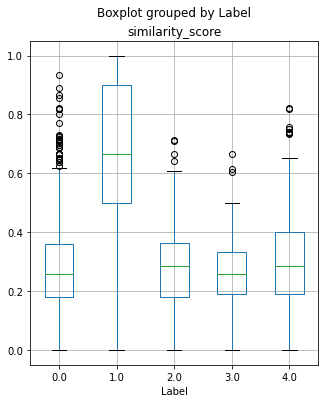

In [219]:
df.boxplot (column='similarity_score', by='Label', figsize=(5,6))

In [220]:
# Calculate Average Similarity Score:
avg = []
labels = [0,1,2,3,4]
for l in labels:
    avg.append(sum(df[df['Label'] == l]['similarity_score'])/len(df[df['Label'] == l]['similarity_score']))
print(avg)
    


[0.2877243067133665, 0.6703663970409184, 0.2854482294053134, 0.2758006749394707, 0.31022968700889114]


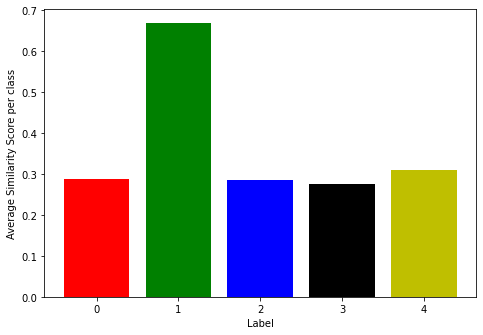

In [221]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,avg,color = ['r', 'g', 'b', 'k', 'y', 'm', 'c'])
plt.xlabel('Label')
plt.ylabel('Average Similarity Score per class')
plt.show()

## Applying Model on Unlabelled Data

In [28]:
import pandas as pd
import pandasql as ps

In [29]:
# Load The dataset 
data = pd.read_csv('Dataset/verusen_manufacturer_names_export_10182022.csv',index_col=None)

In [30]:
data.rename(columns={"Unnamed: 0": "ID"},inplace = True)
#data.drop([''], axis=1,inplace = True)

In [31]:
data = data.head(1000)

In [32]:
data

ID                    manufacturer_name
0       0                   VASHON HIGH SCHOOL
1       1                          CCEPPA S.A.
2       2                            JOE ALVES
3       3        ASSOCIACAO COOPERTAXI GUARUJA
4       4                   Mr Julien Langlois
..    ...                                  ...
995  1018                       RAMIREZ Martin
996  1020     FELIPE APARECIDO SOARES BENEDITO
997  1021  HARTHANA CONSULTORIA & PARTICIPACOE
998  1022                CORNER POCKET (34181)
999  1023         PARTICIPAR DESENVOLVIMENTO E

[1000 rows x 2 columns]

In [37]:
res = ps.sqldf("SELECT a.manufacturer_name as Company_A, b.manufacturer_name as Company_B FROM data as a, data as b where a.ID != b.ID;")

In [38]:
res
#res.drop(['ID'], axis=1,inplace = True)

Company_A                            Company_B
0                 VASHON HIGH SCHOOL                          CCEPPA S.A.
1                 VASHON HIGH SCHOOL                            JOE ALVES
2                 VASHON HIGH SCHOOL        ASSOCIACAO COOPERTAXI GUARUJA
3                 VASHON HIGH SCHOOL                   Mr Julien Langlois
4                 VASHON HIGH SCHOOL         MARIA JOSÉLIA MENDES DE MELO
...                              ...                                  ...
998995  PARTICIPAR DESENVOLVIMENTO E                 Mukesh Kumar Thawait
998996  PARTICIPAR DESENVOLVIMENTO E                       RAMIREZ Martin
998997  PARTICIPAR DESENVOLVIMENTO E     FELIPE APARECIDO SOARES BENEDITO
998998  PARTICIPAR DESENVOLVIMENTO E  HARTHANA CONSULTORIA & PARTICIPACOE
998999  PARTICIPAR DESENVOLVIMENTO E                CORNER POCKET (34181)

[999000 rows x 2 columns]

In [35]:
res.to_csv('merge.csv',index=False)

In [41]:
cosine = Cosine(2)
res["p0"] = res["Company_A"].apply(lambda s: cosine.get_profile(s)) 
res["p1"] = res["Company_B"].apply(lambda s: cosine.get_profile(s)) 
res["cosine_sim"] = [cosine.similarity_profiles(p0,p1) for p0,p1 in zip(res["p0"],res["p1"])]
res.drop(["p0", "p1"], axis=1, inplace = True)

In [46]:
res[res['cosine_sim'] > 0.4]

Company_A  \
253                      VASHON HIGH SCHOOL   
1433                            CCEPPA S.A.   
2037                              JOE ALVES   
2765                              JOE ALVES   
3560          ASSOCIACAO COOPERTAXI GUARUJA   
...                                     ...   
996815  HARTHANA CONSULTORIA & PARTICIPACOE   
996924  HARTHANA CONSULTORIA & PARTICIPACOE   
997001  HARTHANA CONSULTORIA & PARTICIPACOE   
998357         PARTICIPAR DESENVOLVIMENTO E   
998998         PARTICIPAR DESENVOLVIMENTO E   

                                  Company_B  cosine_sim  
253          NORTHAMPTON COUNTY HIGH SCHOOL    0.523217  
1433                       GASTRODANCE S.A.    0.445435  
2037        THIAGO ALEXANDRE ALVES DE SOUZA    0.483046  
2765                              ROSSVALVE    0.400892  
3560         NH ST ASSOC OF LETTER CARRIERS    0.407687  
...                                     ...         ...  
996815                    BHATIA COAL CORP.    0.419371  
996924     COMPANIA PANAMENA DE AVIACION SA    0.438208  
997001         PARTICIPAR DESENVOLVIMENTO E    0.438233  
998357  BRISA SOCIEDADE P O DESENVOLVIMENTO    0.554437  
998998  HARTHANA CONSULTORIA & PARTICIPACOE    0.438233  

[4196 rows x 3 columns]

In [88]:
X_new = res.iloc[:, 2].values 
X_new = scaler.transform(X_new.reshape(-1,1)) 
predictive_labels = gnb.predict(X_new)

In [89]:
final_df = pd.DataFrame({'Company A':res['Company_A'],'Company B':res['Company_B'],'Label' : predictive_labels})

In [94]:
Counter(final_df['Label'])

Counter({0.0: 998990, 1.0: 10})

In [95]:
final_df[final_df['Label'] == 1]

Company A                   Company B  Label
113508           S & S ENGINEERING         EMINENT ENGINEERING    1.0
117416  SHRI DURGA TRADING COMPANY   JAI DURGA TRADING COMPANY    1.0
156751       NOPAC ; Non-Strategic         JBJ ; Non-Strategic    1.0
233388            WINTEC ENGINEERS         EMINENT ENGINEERING    1.0
533583   JAI DURGA TRADING COMPANY  SHRI DURGA TRADING COMPANY    1.0
621491         EMINENT ENGINEERING           S & S ENGINEERING    1.0
621611         EMINENT ENGINEERING            WINTEC ENGINEERS    1.0
895012       KELLY ; Non-Strategic         JBJ ; Non-Strategic    1.0
907248         JBJ ; Non-Strategic       NOPAC ; Non-Strategic    1.0
907987         JBJ ; Non-Strategic       KELLY ; Non-Strategic    1.0